## Statistical Learning (Statistics and Data Analysis)

This notebook is an introduction to essential concepts in statistics. 

1. [Load Dataset](#1)

2. [Histogram](#2)

3. [Finding Outliers using IQR](#3)

4. [Box Plot](#4)

5. [Summary Statistics](#5)

6. [CDF](#6)

7. [Effect size](#7)

8. [Relationship between variables](#8)

9. [Correlation](#9)

10. [Covariance](#10)

11. [Pearson Correlation](#11)

12. [Spearman's Rank Correlation](#12)

13. [Mean VS Median](#13)

14. [Hypothesis Testing](#14)

15. [Normal(Gaussian) Distribution and z-score](#15)

16. [Finding outliers using Z score](#16)

## <a name="1">Load Dataset</a>

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("data/data.csv")
data.drop(["Unnamed: 32","id"],1,inplace=True)

In [3]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [4]:
print("The columns of the dataset are: {}".format(data.columns))

print("The shape of the dataframe is: {}".format(data.shape))

The columns of the dataset are: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
The shape of the dataframe is: (569, 31)


## <a name="2">Histogram</a>

How many times each value appears in the dataset ?

Frequency=number of times each value appears

Example: [1,1,1,1,2,2,2]. Frequency of 1 is four and frequency of 2 is three

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

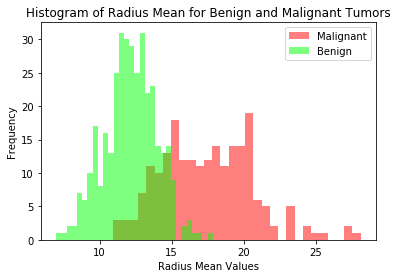

In [6]:
m=plt.hist(data[data["diagnosis"]=="M"].radius_mean,bins=30,fc=(1,0,0,0.5),label="Malignant")
b=plt.hist(data[data["diagnosis"]=="B"].radius_mean,bins=30,fc=(0,1,0,0.5),label="Benign")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Benign and Malignant Tumors")
plt.show()

**Observations**:
- Radius mean of malignant tumors are bigger than radius mean of benign tumors
- The benign distribution is approximately bell-shaped (shape of normal distribution -> gaussian distribution)

Let's find the most frequent radius mean of malignant tumors:

In [7]:
print("Most frequent malignant radius mean is: {}".format(data.loc[data["diagnosis"]=="M"].radius_mean.value_counts().idxmax()))

Most frequent malignant radius mean is: 15.46


## <a name="3">Finding Outliers using IQR</a>

An outlier is a data point in a data set that is distant from all other observations. In other words, a data point that lies outside the overall distribution of the dataset.

Calculating outliers:
- first we need to calculate first quartile Q1 and third quartile Q3
- then find IQR=Q3-Q1
- finally compute Q1-1.5IQR and Q3+1.5IQR
- anything outside this range is an outlier

In [8]:
benign_data=data[data["diagnosis"]=="B"]
malignant_data=data[data["diagnosis"]=="M"]
desc=benign_data["radius_mean"].describe()
Q1=desc[4]
Q3=desc[6]
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print("Anything outside this range is an outlier: ({},{})".format(lower_bound,upper_bound))
benign_data[benign_data["radius_mean"]<lower_bound].radius_mean
print("Outliers: {}".format(benign_data[(benign_data["radius_mean"]<lower_bound)|(benign_data["radius_mean"]>upper_bound)].radius_mean.values))

Anything outside this range is an outlier: (7.645000000000001,16.805)
Outliers: [ 6.981 16.84  17.85 ]


## <a name="4">Box Plot</a>

We can see outliers from box plots:

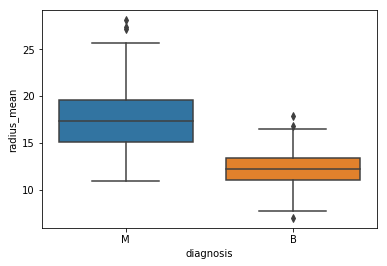

In [9]:
sns.boxplot(x="diagnosis",y="radius_mean",data=data)
plt.show()

## <a name="5">Summary Statistics</a>

- Mean
- Variance: spread of distribution
- Standard deviation: square root of variance

In [10]:
print("mean: {}".format(benign_data["radius_mean"].mean()))
print("variance: {}".format(benign_data["radius_mean"].var()))
print("standard deviation: {}".format(benign_data["radius_mean"].std()))

benign_data["radius_mean"].describe()

mean: 12.14652380952381
variance: 3.170221722043872
standard deviation: 1.7805116461410389


count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64

## <a name="6">CDF</a>

Cumulative distribution function is the probability that the variable takes a value less than or equal to x. P(X<=x).

For example, the probability that the variable takes a value less than or equal to 12 (radius mean) is 0.5 (approx.).

In [11]:
import numpy as np

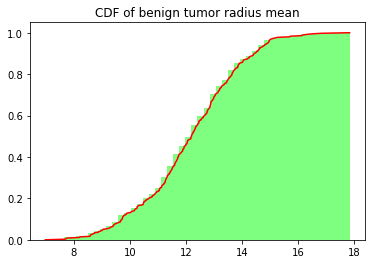

In [14]:
plt.hist(benign_data["radius_mean"],bins=50,fc=(0,1,0,0.5),label="Benign",normed=True,cumulative=True)
sorted_data=np.sort(benign_data["radius_mean"])
y=np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color="red")
plt.title("CDF of benign tumor radius mean")
plt.show()

## <a name="7">Effect size</a>

It describes the size of an effect. It's a simple way of quantifying the difference between two groups (size of the difference).

Let's use the Cohen effect size:

In [15]:
mean_diff=malignant_data["radius_mean"].mean()-benign_data["radius_mean"].mean()
var_benign=benign_data["radius_mean"].var()
var_malignant=malignant_data["radius_mean"].var()
var_pooled=(len(benign_data)*var_benign+len(malignant_data)*var_malignant)/float(len(benign_data)+len(malignant_data))
effect_size=mean_diff/np.sqrt(var_pooled)
print("Effect size: {}".format(effect_size))

Effect size: 2.2048585165041428


Cohen suggests that if d(effect_size)=0.2 it's a small effect size, d=0.5 a medium effect size and d=0.8 a large effect size.

As we expected the effect size is too big and says that the two groups are different from each other. Our two groups are benign radius mean and malignant radius mean.

## <a name="8">Relationship between variables</a>

We can say that two variables are related to each other, if one of them gives information about the other one.

Let's look at the relationship between radius mean and area mean:

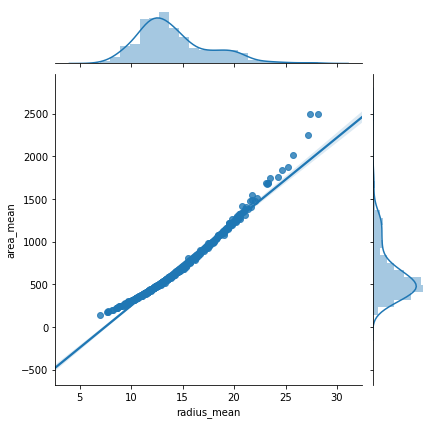

In [16]:
sns.jointplot(data["radius_mean"],data["area_mean"],kind="regg")
plt.show()

We can see that when radius mean increases, area mean also increases. They are positively correlated with each other.

Let's look at the relationship between more than two variables:

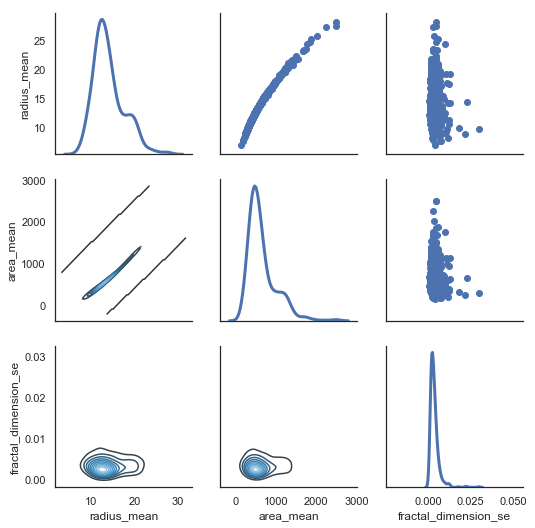

In [17]:
sns.set(style="white")
g=sns.PairGrid(data.loc[:,["radius_mean","area_mean","fractal_dimension_se"]],diag_sharey=False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw=3)
plt.show()

There is no correlation between area mean and fractual dimension se. Because when area mean changes, fractual dimension se is not affected.

## <a name="9">Correlation</a>

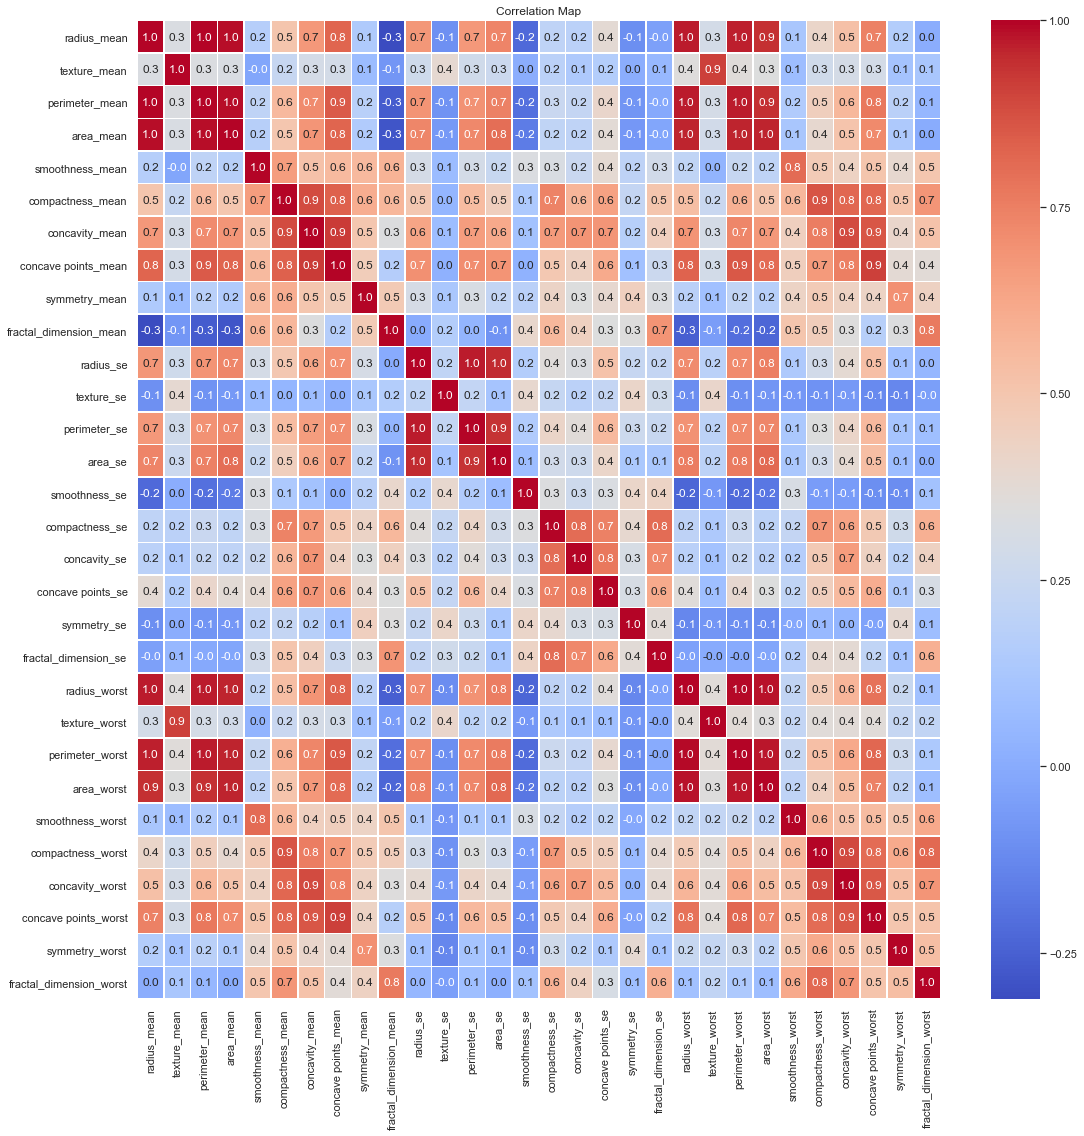

In [18]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,cmap="coolwarm",fmt=".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Map")
plt.show()

**Observations**:
- Huge matrix that includes a lot of numbers
- The range are between -1 and 1

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

## <a name="10">Covariance</a>

Covariance is a measure of how much two random variables vary together.

The covariance is:
- maximized if two vectors are identical
- zero if they are orthogonal
- negative if they point in opposite direction

In [19]:
print("Covariance between radius mean and area mean: {}".format(data["radius_mean"].cov(data["area_mean"])))
print("Covariance between radius mean and fractal dimension se: {}".format(data["radius_mean"].cov(data["fractal_dimension_se"])))

Covariance between radius mean and area mean: 1224.4834093464565
Covariance between radius mean and fractal dimension se: -0.0003976248576440626


## <a name="11">Pearson Correlation</a>

Let's look at Pearson correlation between radius mean and area mean:

In [20]:
print("Pearson correlation: ")
print(data.loc[:,["area_mean","radius_mean"]].corr(method="pearson"))
print("Pearson correlation: {}".format(data["radius_mean"].cov(data["area_mean"])/(data["radius_mean"].std()*data["area_mean"].std())))

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation: 0.9873571700566128


Person correlation between area mean and radius mean is 0.98 that means that they are positively correlated with each other.

## <a name="12">Spearman's Rank Correlation</a>

Pearson correlation works well if the relationship between variables are linear and normal. But it is not robust, if there are outliers.

To compute Spearman's correlation we need to compute rank of each value

In [27]:
ranked_data=data.rank()
spearman_corr=ranked_data.loc[:,["area_mean","radius_mean"]].corr(method="pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


If the relationship between variables are non linear, Spearman's correlation tends to better estimate the strength of the relationship.

Pearson correlation can be affected by outliers. Spearman's correlation is more robust.

## <a name="13">Mean VS Median</a>

In [21]:
salary=[1,4,3,2,5,4,2,3,1,500]
print(np.mean(salary))

52.5


Median avoids outliers

In [22]:
print(np.median(salary))

3.0


## <a name="14">Hypothesis Testing</a>

**What is hypothesis testing ?**

Hypothesis testing is a statistical method that is used in making statistical decisions using experimental data. In other words, Hypothesis Testing is an assumption that we make about the population parameter.

For example: Boys are taller than girls.

We need some mathematical conclusion whatever we are assuming is true.

**Why do we use it ?**

A hypothesis test evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample data.

**Null hypothesis**: is a general statement or default position that there is no relationship between two measured phenomena, or no association among groups. In other words it is a basic assumption.

**Alternative hypothesis**: is the hypothesis used in hypothesis testing that is contrary to the null hypothesis.

**Level of significance**: refers to the degree of significance in which we accept or reject the null-hypothesis. 100% accuracy is not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance that is usually 5%. This is denoted with alpha and generally it is 0.05 or 5%, which means your output should be 95% confident to give similar kind of result in each sample.

Reject H0 and H0 is not true (no error)
Do not reject H0 and H0 is true (no error)
Reject H0 and H0 is true (Type 1 Error)
Do not reject H0 and H0 is not true (Type 2 error)

**Type I error**: when we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region.

**Type II error**: when we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.

**P-value**: or calculated probability, is the probability of finding the observed, or more extreme, results when the null hypothesis (H0) of a study question is true. If the P-value is less than the chosen significance level then you reject the null hypothesis i.e. accept that our sample gives reasonable evidence to support the alternative hypothesis (H1).

A p-value is the probability of finding equal or more extreme results when the null hyptohesis (H0) is true. In other words, a low p-value means that we have compelling evidence to reject the null hypothesis.

If the p-value is lower than 5% (p < 0.05). We often reject H0 and accept Ha is true. We say that p < 0.05 is statistically significant, because there is less than 5% chance that we are wrong in rejecting the null hypothesis.

**Student's t-test**: A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features. It is mostly used when the datasets, like the set of data recorded as outcome from flipping a coin a 100 times, would follow a normal distribution and may have unknown variances.

T-test has 2 types : 1. one sample t-test 2. two-sample t-test.

**One sample t-test**: determines whether the sample mean is statistically different from a known or hypothesised population mean.

Example: we have 10 ages and we are checking whether average age is 30 or not.

In [1]:
from scipy.stats import ttest_1samp
import numpy as np

ages=np.genfromtxt("data/ages.csv")
print(ages)

ages_mean=np.mean(ages)
print(ages_mean)

t_set,p_val=ttest_1samp(ages,30)
print("p-value: {}".format(p_val))

if p_val<0.05: # alpha value is 0.05 or 5%
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

[32. 34. 29. 29. 22. 39. 38. 37. 38. 36. 30. 26. 22. 22.]
31.0
p-value: 0.5605155888171379
We accept null hypothesis


**Two sample t-test**: compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. This test is also known as: Independent t Test.

Example: is there any association between week1 and week2

In [48]:
from scipy.stats import ttest_ind

week1=np.genfromtxt("data/week1.csv",delimiter=",")
week2=np.genfromtxt("data/week2.csv",delimiter=",")

print(week1)
print(week2)

week1_mean=np.mean(week1)
week2_mean=np.mean(week2)
print("week1 mean value: {}".format(week1_mean))
print("week2 mean value: {}".format(week2_mean))

week1_std=np.std(week1)
week2_std=np.std(week2)
print("week1 std value: {}".format(week1_std))
print("week2 std value: {}".format(week2_std))

ttest,p_val=ttest_ind(week1,week2)
print("p-value: {}".format(p_val))

if p_val<0.05: # alpha value is 0.05 or 5%
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

[23.90506824 26.67631982 27.27433886 24.25757125 32.40423483 39.56919357
 23.07010059 29.82068109 27.59433809 28.05639569 27.06757262 30.41192979
 25.71358554 24.94294823 28.23123807 24.95337555 18.51231639 27.46234762
 28.38016611 13.91205901 29.02615866 26.90746774 22.8677726  24.8938289
 25.96947935 26.86869621 20.72676456 27.35988314 20.68408581 21.19846143
 16.25800931 23.92517681 24.47923229 29.47050863 27.28425372 26.93339272
 28.61026924 18.88377042 33.65468651 25.69470077 20.98291356 22.69700387
 28.60278855 21.36000443 30.77685156 20.83415999 23.79367158 19.7556718
 29.54421084 20.1433138 ]
[18.63431907 31.28788036 34.96797943 21.81678117 28.21619974 39.39313736
 35.52223207 27.54222109 33.64395433 25.31673581 28.81392191 30.7358016
 26.37241881 26.0945555  26.34073477 19.42196017 32.58797652 24.84001926
 28.93348335 20.43667584 22.72495967 32.31728012 35.384306   29.66709637
 24.53512973 30.91406007 19.56117513 24.90816833 30.13163726 31.47466199
 27.77683598 16.51307462 35.

**When we can run a Z Test**:
- sample size greater than 30. Otherwise, use a t test
- data points should be independent from each other
- data should be normally distributed
- data should be randomly selected from a population, where each item has an equal chance of being selected

Example: we are using z-test for blood pressure with some mean like 156

In [2]:
# one-sample Z test
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

df=pd.read_csv("data/blood_pressure.csv")

ztest,p_val=stests.ztest(df["bp_before"],x2=None,value=156)
print(p_val)

if p_val<0.05: # alpha value is 0.05 or 5%
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

0.6651614730255063
We accept null hypothesis


**Two-sample Z test**:  similar to t-test here we are checking two independent data groups and deciding whether sample mean of two group is equal or not.

H0: mean of two group is 0  
H1: mean of two group is not 0

In [7]:
ztest,p_val1=stests.ztest(x1=df["bp_before"],x2=df["bp_after"],value=0,alternative="two-sided")
print(float(p_val1))

if p_val1<0.05: # alpha value is 0.05 or 5%
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

0.002162306611369422
We reject null hypothesis


**ANOVA (F-test)**: The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.

Null hypotheses: Groups means are equal (no variation in means of groups)  
Alternative hypotheses: At least, one group mean is different from other groups

**ANOVA Assumptions**
- Residuals (experimental error) are normally distributed (Shapiro Wilks Test)
- Homogeneity of variances (variances are equal between treatment groups) (Levene or Bartlett Test)
- Observations are sampled independently from each other

**How ANOVA works?**
- Check sample sizes: equal number of observation in each group
- Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degree of freedom (df) for a group
- Calculate Mean Square error (MSE) (SS error/df of residuals)
- Calculate F-value (MS of group/MSE)

**One Way F-test (Anova)**: It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example: there are four treatments (A, B, C, and D), which are groups for ANOVA analysis. Treatments are independent variable and termed as factor. As there are four types of treatments, treatment factor has four levels.

For this example, there is only one factor (treatments) or independent variable to evaluate, and therefore, one-way ANOVA is suitable for analysis.

2.639241146210922e-05
We reject null hypothesis


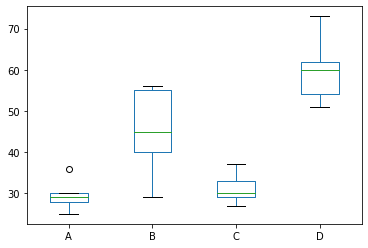

In [8]:
import pandas as pd

df=pd.read_csv("data/onewayanova.txt",sep="\t")

import scipy.stats as stats

fvalue,pvalue=stats.f_oneway(df["A"],df["B"],df["C"],df["D"])
print(pvalue)

if pvalue<0.05: # alpha value is 0.05 or 5%
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")
    
df.boxplot(column=["A","B","C","D"],grid=False)

The P-value obtained from ANOVA analysis is significant (P<0.05), and therefore, we conclude that there are significant differences among treatments.

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# reshape the d dataframe suitable for statsmodels package
df_melted=pd.melt(df.reset_index(),id_vars=["index"],value_vars=["A","B","C","D"])
df_melted.columns=["index","treatments","value"]

# Ordinary Least Squares (OLS) model
model=ols("value ~ C(treatments)",data=df_melted).fit()
anova_table=sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison analysis using **Tukey HSD test**.

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp=pairwise_tukeyhsd(endog=df_melted["value"],groups=df_melted["treatments"],alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     15.4 0.0251   1.6929 29.1071   True
     A      C      1.6    0.9 -12.1071 15.3071  False
     A      D     30.4  0.001  16.6929 44.1071   True
     B      C    -13.8 0.0482 -27.5071 -0.0929   True
     B      D     15.0 0.0296   1.2929 28.7071   True
     C      D     28.8  0.001  15.0929 42.5071   True
-----------------------------------------------------


Above results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.

The **Shapiro-Wilk** test can be used to check the normal distribution of residuals. Null hypothesis: data is drawn from normal distribution.

In [14]:
import scipy.stats as stats

w,pvalue=stats.shapiro(model.resid)
print(w,pvalue)

0.9685019850730896 0.7229772806167603


As the P-value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

As the data is drawn from normal distribution, let's use **Bartlett’s test** to check the Homogeneity of variances. Null hypothesis: samples from populations have equal variances.

In [15]:
w,pvalue=stats.bartlett(df["A"],df["B"],df["C"],df["D"])
print(w,pvalue)

5.687843565012841 0.1278253399753447


As the P-value (0.12) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.

**Two Way F-test (Anova)**

From dataset, there are two factors (independent variables): genotypes and years. Genotypes and years has five and three levels respectively.

Here, using two-way ANOVA, we can simultaneously evaluate how type of genotype and years affects the yields of plants. If you apply one-way ANOVA here, we can evaluate only one factor at a time.

In [12]:
import pandas as pd
import seaborn as sns

df=pd.read_csv("data/twowayanova.txt",sep="\t")

# let's reshape the d dataframe suitable for statsmodels package
df_melted=pd.melt(df,id_vars=["Genotype"],value_vars=["1_year","2_year","3_year"])
df_melted.columns=["Genotype","years","value"]

# sns.boxplot(x="Genotype",y="value",hue="years",data=df_melted,palette="Set3")

From two-way ANOVA, we can tests three hypotheses 1) effect of genotype on yield 2) effect of time (years) on yield, and 3) effect of genotype and time (years) interactions on yield

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model=ols("value ~ C(Genotype) + C(years) + C(Genotype):C(years)",data=df_melted).fit()
anova_table=sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


The P-value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (P<0.05). We conclude that type of genotype significantly affects the yield outcome, time (years) significantly affects the yield outcome, and interaction of both genotype and time (years) significantly affects the yield outcome.



## <a name="15">Normal(Gaussian) Distribution and z-score</a>

A variable is said to be normally distributed or have a normal distribution if its distribution has the shape of a normal curve. Also called bell shaped distribution. The graph of a normal distribution is called the normal curve.

In [107]:
import pandas as pd
import numpy as np

np.random.seed(42)
population_size=5000
df_heights=pd.DataFrame(data={'us_height_inches':np.random.normal(loc=66,scale=2.9,size=population_size)})

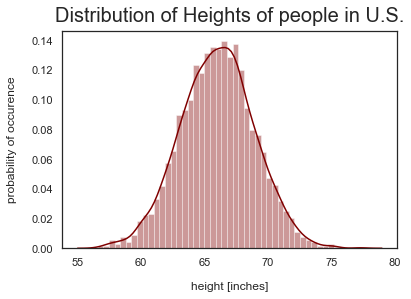

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df_heights["us_height_inches"],color="maroon")
plt.xlabel("height [inches]",labelpad=14)
plt.ylabel("probability of occurence",labelpad=14)
plt.title("Distribution of Heights of people in U.S.",y=1.015,fontsize=20)
plt.show()

Let's calculate the population mean height in the U.S.

In [114]:
pop_mean_us_height_inches=df_heights["us_height_inches"].mean()
print(pop_mean_us_height_inches)

66.01624559725403


Let's calculate the population standard deviation height in the U.S.

In [115]:
pop_std_dev_us_height_inches=df_heights["us_height_inches"].std()
print(pop_std_dev_us_height_inches)

2.889791503580723


A z-score is the number of standard deviations away from a mean for a data point. A z-score helps point out how unusual or usual a data point is from the other values. A z-score must be used with a normal distribution curve.

Given any person's height, we can calculate the number of standard deviations that height is from the mean by using the z-score equation:

In [116]:
df_heights["us_z-score"]=(df_heights["us_height_inches"]-pop_mean_us_height_inches)/pop_std_dev_us_height_inches

In a normal distribution, there is a standard range of values that generally fall within a certain number of standard deviations from the mean:
- 68%: mean+/-std deviation
- 95%: mean+/-1.96std deviation
- 99%: mean+/-2.58std deviation

There are 5000 height values in this dataset. It's likely approximately 68% of values are within +/- 1z-scores from the mean. Let's verify this with our dataset.

In [143]:
values_plus_minus_one_z_score=len(df_heights[df_heights["us_z-score"].between(-1,1)==True])
percent_values_plus_minus_one_z_score=values_plus_minus_one_z_score/len(df_heights)*100
print(percent_values_plus_minus_one_z_score)

68.56


68.56% of values fall within +/- 1z-scores from the mean which is very close to 68%.

Let's visualize the distribution of z-scores:

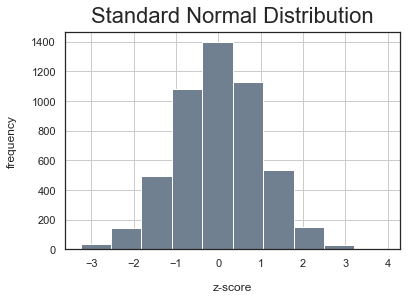

In [121]:
df_heights["us_z-score"].hist(color="slategray")
plt.title("Standard Normal Distribution",y=1.015,fontsize=22)
plt.xlabel("z-score",labelpad=14)
plt.ylabel("frequency",labelpad=14)
plt.show()

The histogram below looks like a normal distribution. The official term for it is a standard normal distribution.

**Comparison of Z-Scores from Two Populations**

In [122]:
height_leslie_inches=63
height_jamie_inches=57

In [128]:
df_heights["philippine_height_inches"]=np.random.normal(loc=61,scale=3.2,size=population_size)

Let's visualize the distribution of heights for people in the U.S., Phillippines as well as Leslie's and Jamie's height.

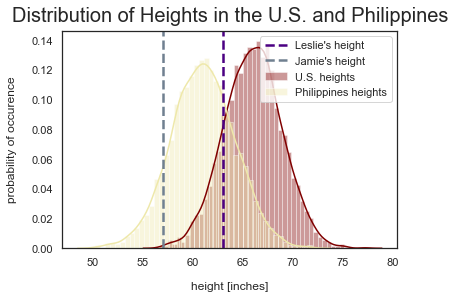

In [130]:
sns.distplot(df_heights["us_height_inches"],color="maroon",label="U.S. heights")
sns.distplot(df_heights["philippine_height_inches"],color="palegoldenrod",label="Philippines heights")
plt.axvline(x=height_leslie_inches,linestyle="--",linewidth=2.5,label="Leslie's height",c="indigo")
plt.axvline(x=height_jamie_inches,linestyle="--",linewidth=2.5,label="Jamie's height",c="slategrey")
plt.title("Distribution of Heights in the U.S. and Philippines",y=1.015,fontsize=20)
plt.xlabel("height [inches]",labelpad=14)
plt.ylabel("probability of occurence",labelpad=14)
plt.legend()
plt.show()

Let's calculate the population mean height in the Philippines.

In [131]:
pop_mean_philippines_height_inches=df_heights["philippine_height_inches"].mean()
print(pop_mean_philippines_height_inches)

61.03376960514118


Let's calculate the population standard deviation height in the Philippines.

In [134]:
pop_std_dev_philippines_height_inches=df_heights["philippine_height_inches"].std()
print(pop_std_dev_philippines_height_inches)

3.1960635117617064


In [136]:
def z_score(value,population_mean,population_std_dev):
    return round((value-population_mean)/population_std_dev,2)

z_score_leslie_us=z_score(height_leslie_inches,pop_mean_us_height_inches,pop_std_dev_us_height_inches)
z_score_jamie_philippines=z_score(height_jamie_inches,pop_mean_philippines_height_inches,pop_std_dev_philippines_height_inches)

print("Leslie has a z-score of {} for her height relative to U.S. heights and Jamie has a z-score of {} relative to Philippines heights.".format(z_score_leslie_us,z_score_jamie_philippines))

Leslie has a z-score of -1.04 for her height relative to U.S. heights and Jamie has a z-score of -1.26 relative to Philippines heights.


Since Leslie's z-score is larger (closer to 0), she's relatively taller compared to people in her country than Jamie is.

**Probability of Occurence given Z-Scores**

With a normal distribution, given an observation's value, we can determine the proportion of observations above or below that value. 

For example, Leslie's height is 63 inches. For what proportion of people is Leslie taller than in the U.S.?

In [138]:
proportion_of_us_ppl_leslie_taller_than=round(stats.norm.cdf(z_score_leslie_us),3)
print(proportion_of_us_ppl_leslie_taller_than)

0.149


This proportion value of 0.149 is equivalent to 14.9%. Leslie is taller than just 14.9% of people in the U.S.

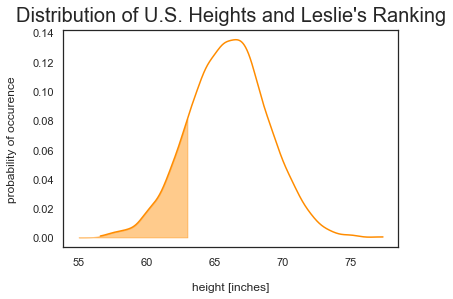

In [141]:
kde=stats.gaussian_kde(df_heights["us_height_inches"])
pos=np.linspace(df_heights["us_height_inches"].min(),df_heights["us_height_inches"].max(),50000)
plt.plot(pos,kde(pos),color="darkorange")
shade=np.linspace(55,height_leslie_inches,300)
plt.fill_between(shade,kde(shade),alpha=0.45,color="darkorange",)
plt.title("Distribution of U.S. Heights and Leslie's Ranking",y=1.012,fontsize=20)
plt.xlabel("height [inches]",labelpad=15)
plt.ylabel("probability of occurence",labelpad=15)
plt.show()

## <a name="16">Finding outliers using Z score</a>

Formula for Z score = (Observation - Mean)/Standard Deviation

In [146]:
import pandas as pd
import numpy as np

dataset=[10,12,12,13,12,11,14,13,15,10,10,10,100,12,14,13,12,10,10,11,12,15,12,13,12,11,14,13,15,10,15,12,10,14,13,15,10]

threshold=3

mean=np.mean(dataset)
std=np.std(dataset)

outliers=[]

for y in dataset:
    z_score=(y-mean)/std
    if np.abs(z_score)>threshold:
        outliers.append(y)

print(outliers)

[100]
